# Crawling Pada Berita

Crawling adalah proses mengumpulkan data dari berbagai sumber di internet secara otomatis. Dalam konteks web, kegiatan ini seringkali merujuk pada web crawling, yaitu mengakses dan mengumpulkan informasi dari halaman-halaman web.
Data yang akan di crawling kali ini berasal darilaman detik.com, dengan kategori detikSport dan detikHealth

## Crawling berita

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/PPW/

Mounted at /content/drive
/content/drive/MyDrive/PPW


In [2]:
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd

#### Crawling DetikSport

In [4]:
def crawl_detiksport(url):
  berita_list = []
  for halaman in range(1):
    url = url
    #mengambil data dari detik.com
    # req = requests.get(url,header)
    req = requests.get(url).content
    # soup = BeautifulSoup(req.text,'lxml')
    soup = BeautifulSoup(req,'lxml')
    listberita = soup.find('div',class_='list media_rows list-berita')
    artikel = listberita.find_all('article')
    for x in artikel:
      url2 = x.find('a')['href']
      judul = x.find('a').find('h2').text
      #mengambil data dari setiap konten
      # urlkonten = requests.get(url2,header)
      urlkonten = requests.get(url2).content
      soupkonten = BeautifulSoup(urlkonten,'lxml')
      konten = soupkonten.find_all('div',class_='detail__body-text itp_bodycontent')
      for x in konten:
        kategori = 'detiksport'
        isi = x.find_all('p')
        y = [y.text for y in isi]
        fixkonten = ''.join(y).replace('\n','').replace('ADVERTISEMENT','').replace('SCROLL TO RESUME CONTENT','')
        berita_list.append([judul,fixkonten, kategori])
  return berita_list

# urlnews = 'https://www.detik.com/search/searchall?query=terbaru&siteid=21&sortby=time&page=2'
# get_news = crawl_detiksport(urlnews)
data = []
for i in range(1,8):
  cr = crawl_detiksport('https://www.detik.com/search/searchall?query=terbaru&siteid=21&sortby=time&page=%d'%i)
  data = data+cr
frame_detiksport = pd.DataFrame(data,columns =['Judul','Isi','Kategori'])
frame_detiksport
# frame_berita.to_csv('crawl_detiksport.csv')


,Judul,Isi,Kategori
0,Pesan Alan Budikusuma: Bulutangkis Menjanjikan...,Legenda bulutangkis Indonesia Alan Budikusuma ...,detiksport
1,Pembibitan Atlet Wing Chun Dapat Dukungan,Olahraga Wing Chun Indonesia terus berkembang....,detiksport
2,"Diskon Eksklusif Bank Mega, Tawarkan Pengalama...",Sedari dulu golf bukanlah olahraga yang ecek-e...,detiksport
3,Head to Head Leo/Daniel vs Reddy/Shetty: The B...,Leo Rolly Carnando/Daniel Marthin berhadapan d...,detiksport
4,Ranking BWF Pekan Ini: Jonatan Dekati Anthony ...,Tunggal putra Indonesia Jonatan Christie terus...,detiksport
...,...,...,...
58,Gregoria Mariska Tunjung Tembus Ranking 9 Duni...,Tunggal putri Indonesia Gregoria Mariska Tunju...,detiksport
59,"'McGregor Forever', Sebuah Penanda Kalau The N...",Netflix meluncurkan film dokumenter 'McGregor ...,detiksport
60,Rekap Medali Indonesia di SEA Games 2023 Sore ...,Kontingen Tim Indonesia menambah koleksi medal...,detiksport
61,"Klasemen Medali SEA Games 2023: Sudah 79 Emas,...",Kontingen Tim Indonesia menembus 79 medali ema...,detiksport


#### Crawling DetikHealth

In [5]:
def crawl_detikhealth(url):
  berita_list = []
  for halaman in range(1):
    url = url
    #mengambil data dari detik.com
    req = requests.get(url).content
    # soup = BeautifulSoup(req.text,'lxml')
    soup = BeautifulSoup(req,'lxml')
    listberita = soup.find('div',class_='list media_rows list-berita')
    artikel = listberita.find_all('article')
    for x in artikel:
      geturlberita= x.find('a')['href']
      judul = x.find('a').find('h2').text
      # mengambil data dari setiap konten
      urlkonten = requests.get(geturlberita).content
      soupkonten = BeautifulSoup(urlkonten,'lxml')
      konten = soupkonten.find_all('div',class_='detail__body-text itp_bodycontent')
      for x in konten:
        kategori = 'detikhealth'
        isi = x.find_all('p')
        y = [y.text for y in isi]
        fixkonten = ''.join(y).replace('\n','').replace('ADVERTISEMENT','').replace('SCROLL TO RESUME CONTENT','')
        berita_list.append([judul,fixkonten, kategori])
  return berita_list

data = []
for i in range(1,7):
  cr = crawl_detikhealth('https://www.detik.com/search/searchall?query=terbaru&siteid=55&sortby=time&page=%d'%i)
  data = data+cr
frame_detikhealth = pd.DataFrame(data,columns =['Judul','Isi','Kategori'])
frame_detikhealth
# frame_berita.to_csv('crawl_detikhealth.csv')


,Judul,Isi,Kategori
0,"Sederet Rumor Penyakit Putin, Sempat Disebut P...","Presiden Rusia, Vladimir Putin, telah berkali-...",detikhealth
1,"7 Rahasia untuk Perlambat Penuaan, Bisa Bikin ...",Setiap orang akan mengalami penuaan di kehidup...,detikhealth
2,RSCM: Pasien MPox Meninggal karena Ada Riwayat...,Indonesia kini mencatat total 57 kasus cacar m...,detikhealth
3,Mantan Presiden AS Donald Trump Pamer Surat Do...,Dokter Donald Trump baru-baru ini menulis cata...,detikhealth
4,Sebaran Terbaru Kasus Mpox di RI: Sudah Sampai...,"Kasus Mpox terus merangkak naik, DKI Jakarta k...",detikhealth
5,"Total Sudah 51 Kasus Mpox di RI, Semuanya Tert...","Kasus Mpox di Indonesia terus bertambah, berda...",detikhealth
6,Etawalin Dukung Pembasmian Sindikat Pemalsu Ob...,Kepolisian Daerah Istimewa Yogyakarta (DIY) pa...,detikhealth
7,Waspada! Ini Kondisi yang Diam-diam Picu Penya...,Aterosklerosis adalah pengerasan pada pembuluh...,detikhealth
8,Terbaru! WHO Tetapkan Kesepian Jadi Ancaman Ke...,Organisasi Kesehatan Dunia (WHO) menetapkan ke...,detikhealth
9,Kabar Terbaru Luhut Pasca Diperbolehkan Pulang...,Menkomarinves Luhut Binsar Pandjaitan menyampa...,detikhealth


Merge detikSport dan detikHealth menjadi satu dataset

In [10]:

# Menggabungkan DataFrames secara berurutan (baris-wise)
frame_berita = pd.concat([frame_detiksport, frame_detikhealth])
frame_berita.to_csv('crawling_detiksporthealth.csv')




## Ekstraksi kalimat

Setelah melakukan crawling pada berita, maka akan dilakukan ekstraksi kalimat pada isi berita, dengan tujuan mencari kalimat penting pada suatu berita

In [12]:
termFreq = pd.read_csv("crawling_detiksporthealth.csv")

a = termFreq['Isi']
a

0      Legenda bulutangkis Indonesia Alan Budikusuma ...
1      Olahraga Wing Chun Indonesia terus berkembang....
2      Sedari dulu golf bukanlah olahraga yang ecek-e...
3      Leo Rolly Carnando/Daniel Marthin berhadapan d...
4      Tunggal putra Indonesia Jonatan Christie terus...
                             ...                        
110    Telah ditemukan tujuh kasus cacar monyet atau ...
111    Kabid P2P Dinkes DKI Jakarta dr Dwi Oktavia, M...
112    Kasus cacar monyet atau monkeypox di Indonesia...
113    Pasien cacar monyet atau Mpox terus bertambah ...
114    Blue Zone atau Zona Biru adalah istilah yang d...
Name: Isi, Length: 115, dtype: object

Import library yang diperlukan

In [14]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx


# Hitung kesamaan kosinus antara kalimat


In [15]:
# Inisialisasi spaCy untuk pemrosesan teks
nlp = spacy.load('en_core_web_sm')

Ambil salah satu kalimat isi dari data, sebagai contoh

In [16]:
text = termFreq['Isi'][1]

In [17]:
# Ekstrak kalimat dari teks
doc = nlp(text)
sentences = [sent.text for sent in doc.sents]

Menghitung TF-IDF kalimat

In [18]:
# Hitung TF-IDF dari kalimat
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(sentences)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df

,10,12,2016,2017,2022,2023,22,330,acara,adalah,...,vtaa,wakil,wali,walisongo,wing,with,yang,yaqut,yuwono,zhong
0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00000,0.000000,0.247212,0.000000,0.000000,0.000000,0.00000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
2,0.206905,0.206905,0.000000,0.000000,0.00000,0.143143,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00000,0.206905,0.172434,0.000000,0.113496,0.000000,0.00000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.00000,0.170082,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00000,0.000000,0.204886,0.000000,0.000000,0.000000,0.00000,0.000000
4,0.000000,0.000000,0.149801,0.149801,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.149801,0.00000,0.00000,0.000000,0.187265,0.149801,0.246514,0.000000,0.00000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.41941,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00000,0.000000,0.080932,0.000000,0.000000,0.000000,0.00000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00000,0.000000,0.075840,0.000000,0.199670,0.000000,0.00000,0.182002
8,0.000000,0.000000,0.000000,0.000000,0.00000,0.174095,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00000,0.000000,0.209719,0.000000,0.000000,0.000000,0.00000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00000,0.000000,0.113077,0.000000,0.148854,0.000000,0.00000,0.000000


Mencari cosine similarity

In [19]:
cosine_sim = cosine_similarity(tfidf_matrix) #menjadikan tfidf ke cosine

Membuat Graph

In [21]:
graf_result = [] #untuk menyimpan hasil graf akhir
treshold = 0.2 #inisialisasi treshold

G = nx.DiGraph()

# Buat grafik dari kesamaan kosinus
for i_hasil in range(len(cosine_sim)): #inisialisasi indeks awal perulangan dari setiap hasil cosine
  arr_cosim = []

  for j_hasil in range(i_hasil+1,len(cosine_sim)): #inisialisasi indeks kedua perulangan dari setiap hasil cosine
    if cosine_sim[i_hasil][j_hasil] > treshold: #cek apakah cosim dari kalimat 1 dan 2 lebih dari treshold?
      # print(f'Similairty kalimat ke - {i_hasil} : {j_hasil} = {cos_sim[i_hasil][j_hasil]}')

      arr_cosim.append([i_hasil,j_hasil,cosine_sim[i_hasil][j_hasil]]) #menyimpan nilai indeks awal, indeks awal+1, hasil cosim
      G.add_edge(i_hasil,j_hasil,weight=cosine_sim[i_hasil][j_hasil]) #menyimpan nilai indeks awal, indeks awal+1, bobot=hasil cosim

Mencari closeness centrality

In [22]:
graf_result.append(G)
closeness_centrality = nx.closeness_centrality(graf_result[0])

# Temukan kalimat paling penting berdasarkan Closeness Centrality
most_important_sentence_idx = max(closeness_centrality, key=closeness_centrality.get)
most_important_sentence = sentences[most_important_sentence_idx]

Print hasil

In [23]:
# Cetak hasil
print("Kalimat-kalimat dalam teks:")
for i, sentence in enumerate(sentences):
    print(f"{i + 1}. {sentence}")

print("\nKesamaan Kosinus Antara Kalimat:")
print(cosine_sim)

print("\nCloseness Centrality:")
print(closeness_centrality)

print("\nKalimat Paling Penting:")
print(most_important_sentence)


Kalimat-kalimat dalam teks:
1. Olahraga Wing Chun Indonesia terus berkembang.
2. Pembibitannya pun mendapatkan dukungan di Tanah Air.
3. Produsen es krim terpopuler di Indonesia, Aice, berkolaborasi bersama Federasi Wing Chun Indonesia dalam Kejuaraan Nasional Wing Chun Indonesia 2023.Kejuaraan ini sukses diselenggarakan pada 10-12 November yang bertempat di UIN Walisongo Semarang.

Olahraga Wing Chun di Indonesia berhasil menunjukkan potensi yang sangat baik, terutama setelah berhasil menjadi juara umum tiga kali berturut-turut pada Kejuaraan Dunia Wing Chun yang diselenggarakan oleh Federasi Wing Chun Dunia, Ving Tsun Athletic Association (VTAA) pada tahun 2016, 2017, serta yang terbaru pada
6. Oktober tahun 2022 lalu di Hong Kong.
7. Prestasi ini tentunya perlu untuk dipertahankan bahkan ditingkatkan, dan hal ini membutuhkan perhatian tidak hanya oleh para atlet dan pemerintah, namun juga berbagai pihak termasuk swasta untuk turut mendukung dan terlibat dalam pertumbuhan olahraga Wi

Visual grafik dengan matplotlib

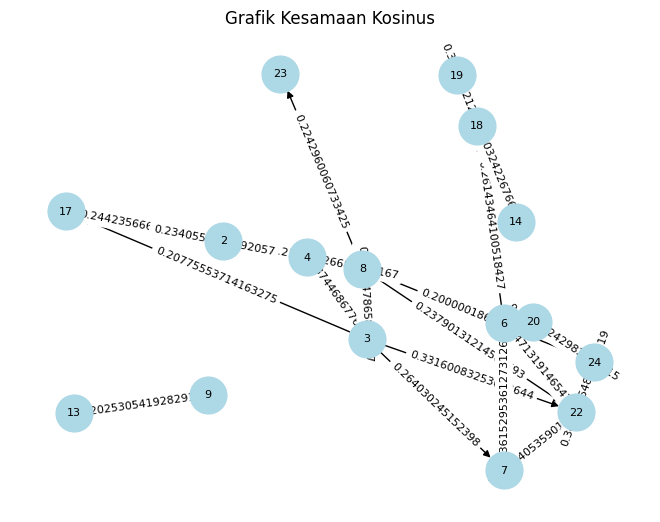

In [24]:
# Visualisasikan grafik
pos = nx.spring_layout(G)
labels = {i: str(i) for i in G.nodes()}
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw(G, pos, with_labels=labels, node_size=700, node_color='lightblue', font_size=8, font_color='black')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title("Grafik Kesamaan Kosinus")
plt.show()

Membuat ringkasan berita dengan menggabungkan 3 kalimat paling penting

In [25]:
my_dict = closeness_centrality
imp_stc = ' '
for i in range(3):
  get_stc = max(my_dict, key=my_dict.get)
  imp_stc=imp_stc+sentences[get_stc]
  my_dict.pop(get_stc)
print(imp_stc)

 Dukungan mereka dalam pembibitan atlet dan talenta muda telah memberikan sumbangan besar dalam memajukan seni bela diri di Indonesia" tambahnya.Wing Chun Indonesia, terutama dalam mendukung pembibitan atlet dan bakat muda.Yaqut Cholil Qoumas, selaku Ketua Umum Federasi Wing Chun Indonesia sekaligus Menteri Agama RI turut hadir dalam membuka acara Kejuaran Nasional Wing Chun 2023 di Semarang.


### Ekstraksi pada seluruh data
Setelah melihat proses yang berjalan untuk mendapatkan kalimat penting dan ringkasan dengan contoh pada satu berita, sekarang kita akan mengekstraksi seluruh berita pada data hasil crawling untuk mencari ringkasan berdasarkan 3 kalimat paling penting

In [35]:
read = pd.read_csv("crawl_detiksport.csv")

In [46]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx

# Inisialisasi spaCy untuk pemrosesan teks
nlp = spacy.load('en_core_web_sm')
kal_imp = {}
imp_sc_result = []
for i in range(len(termFreq['Isi'])):
  text = termFreq['Isi'][i]
  # Ekstrak kalimat dari teks
  doc = nlp(text)
  sentences = [sent.text for sent in doc.sents]

  # Hitung TF-IDF dari kalimat
  vectorizer = TfidfVectorizer()
  tfidf_matrix = vectorizer.fit_transform(sentences)
  tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())


  # Hitung kesamaan kosinus antara kalimat
  cos_sim_result = [] #untuk menyimpan hasil cosine sim akhir
  graf_result = [] #untuk menyimpan hasil graf akhir
  treshold = 0.2 #inisialisasi treshold


  cos_sim_now = []
  graf_now = nx.DiGraph()
  cos_sim = cosine_similarity(tfidf_matrix) #menjadikan tfidf ke cosine

  # cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

  # Buat grafik dari kesamaan kosinus
  for i_hasil in range(len(cos_sim)): #inisialisasi indeks awal perulangan dari setiap hasil cosine
    arr_cosim = []

    for j_hasil in range(i_hasil+1,len(cos_sim)): #inisialisasi indeks kedua perulangan dari setiap hasil cosine
      if cos_sim[i_hasil][j_hasil] > treshold: #cek apakah cosim dari kalimat 1 dan 2 lebih dari treshold?
        # print(f'Similairty kalimat ke - {i_hasil} : {j_hasil} = {cos_sim[i_hasil][j_hasil]}')

        arr_cosim.append([i_hasil,j_hasil,cos_sim[i_hasil][j_hasil]]) #menyimpan nilai indeks awal, indeks awal+1, hasil cosim
        graf_now.add_edge(i_hasil,j_hasil,weight=cos_sim[i_hasil][j_hasil]) #menyimpan nilai indeks awal, indeks awal+1, bobot=hasil cosim

    cos_sim_now.append(arr_cosim)
    # graf_now.append(graf_current)
  cos_sim_result.append(cos_sim_now)
  graf_result.append(graf_now)
  closeness_centrality = nx.closeness_centrality(graf_result[0])

  # Hitung Closeness Centrality
  # closeness_centrality = nx.closeness_centrality(G)

  # Temukan kalimat paling penting berdasarkan Closeness Centrality

  if len(closeness_centrality)!=0:
    imp_stc = ' '
    most_important_sentence_idx = max(closeness_centrality, key=closeness_centrality.get)
    most_important_sentence = sentences[most_important_sentence_idx]
    my_dict = closeness_centrality
    for i in range (2) :
      get_stc = max(my_dict, key=my_dict.get)
      imp_stc=imp_stc+sentences[get_stc]
      my_dict.pop(get_stc)

  else :
    imp_stc = 'tidak ada'
  imp_sc_result.append(imp_stc)
# Memasukkan hasil list ringkasan ke dalam dictionary ringkasan
kal_imp['ringkasan'] = imp_sc_result

Menggabungkan ringkasan ke dalam data hasil crawling

In [47]:
# Join hasil kalimat penting ke dalam data hasil crawling
framedt = pd.DataFrame(kal_imp)
cat_drop = termFreq.drop(columns='Kategori')
cat = termFreq['Kategori']
result = cat_drop.join(framedt)
result = result.join(cat)
result

,Unnamed: 0,Judul,Isi,ringkasan,Kategori
0,0,Pesan Alan Budikusuma: Bulutangkis Menjanjikan...,Legenda bulutangkis Indonesia Alan Budikusuma ...,"""Kami bersyukur pelaksanaan Badminton Fun Fes...",detiksport
1,1,Pembibitan Atlet Wing Chun Dapat Dukungan,Olahraga Wing Chun Indonesia terus berkembang....,Dukungan mereka dalam pembibitan atlet dan ta...,detiksport
2,2,"Diskon Eksklusif Bank Mega, Tawarkan Pengalama...",Sedari dulu golf bukanlah olahraga yang ecek-e...,"Melalui Mega Travel Card, Mega Visa Platinum,...",detiksport
3,3,Head to Head Leo/Daniel vs Reddy/Shetty: The B...,Leo Rolly Carnando/Daniel Marthin berhadapan d...,"Dalam kejuaraan di Denmark itu, Reddy/Shetty ...",detiksport
4,4,Ranking BWF Pekan Ini: Jonatan Dekati Anthony ...,Tunggal putra Indonesia Jonatan Christie terus...,"Sementara ganda putra, Bagas Maulana/Muhammad...",detiksport
...,...,...,...,...,...
110,47,"Ada 7 Kasus di DKI, Kemenkes Perketat Pemantau...",Telah ditemukan tujuh kasus cacar monyet atau ...,Untuk negara tetangga seperti Thailand saat i...,detikhealth
111,48,"Update Kasus Cacar Monyet di Jakarta, Ini Sede...","Kabid P2P Dinkes DKI Jakarta dr Dwi Oktavia, M...",Adapun berikut ini gejala-gejala yang ditemuk...,detikhealth
112,49,Fakta-fakta Kasus Baru Cacar Monyet 'Mpox' di ...,Kasus cacar monyet atau monkeypox di Indonesia...,Indonesia.dr Syahril melaporkan semua pasien ...,detikhealth
113,50,2 Kasus Baru Mpox Ditemukan di DKI! Ini Urutan...,Pasien cacar monyet atau Mpox terus bertambah ...,"""Pasien ketiga gejala seperti pasien Mpox seb...",detikhealth


Menyimpan hasil dalam bentuk csv

In [48]:
result = result.iloc[:,1:]
result.to_csv('dataset_detik.csv')
